<a href="https://colab.research.google.com/github/YueWangpl/MyRepo/blob/master/GAN/stylegan2_pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projecting pokemon images to latent space with StyleGAN2 trained with with human faces.

Reference: https://github.com/woctezuma/stylegan2-projecting-images

## Requirements

### Install ImageMagick

In [ ]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fo

### Switch to Tensorflow 1.x

The default TensorFlow version in Colab switched from  1.x to 2.x on the 27th of March, 2020.

Reference: https://colab.research.google.com/notebooks/tensorflow_version.ipynb

We switch to version 1.x to avoid the following error:
> `ModuleNotFoundError: No module named 'tensorflow.contrib' colab`

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


### Install StyleGAN2

Reference: https://github.com/NVlabs/stylegan2

In [ ]:
%cd /content/

/content


In [ ]:
!rm -rf stylegan2/
!git clone https://github.com/NVlabs/stylegan2.git

Cloning into 'stylegan2'...
remote: Enumerating objects: 127, done.
remote: Total 127 (delta 0), reused 0 (delta 0), pack-reused 127
Receiving objects: 100% (127/127), 591.89 KiB | 1016.00 KiB/s, done.
Resolving deltas: 100% (58/58), done.


In [ ]:
%cd stylegan2/

/content/stylegan2-ada/stylegan2


In [ ]:
!nvcc test_nvcc.cu -o test_nvcc -run

CPU says hello.
cudaErrorNoKernelImageForDevice: no kernel image is available for execution on the device


## Image data

### Boilerplate display functions

In [ ]:
from PIL import Image 
from IPython.display import display

def display_image_from_file(image_name):
  # Reference: https://stackoverflow.com/a/50723518
  
  image_content = Image.open(image_name)
  display(image_content)

  return

def display_image_from_array(array):
  # Reference: https://gist.github.com/kylemcdonald/2f1b9a255993bf9b2629

  image_content = Image.fromarray(array)
  display(image_content) 

  return    

## Pre-processing

### Pre-processing n°1: center-crop the target image to 1024x1024

In [ ]:
center_cropped_image_name = 'emmanuel-macron-crop.jpg'

#### Center-crop

In [ ]:
!ls

dataset_tool.py  metrics		 results	   test_nvcc
dnnlib		 pretrained_networks.py  run_generator.py  test_nvcc.cu
Dockerfile	 projector.py		 run_metrics.py    training
docs		 __pycache__		 run_projector.py
LICENSE.txt	 README.md		 run_training.py


In [ ]:
output_image_folder='/content/img/'

!mkdir -p $output_image_folder

In [ ]:
# References:
# [1] https://gist.github.com/dylanvee/3419976
# [2] http://www.imagemagick.org/Usage/thumbnails/#cut
original_image_name = '../img/117.jpg'
center_cropped_image_name = '../img/117.jpg'
!convert -gravity center -resize 1024x1024^ -extent 1024x1024 $original_image_name $center_cropped_image_name

#### Display

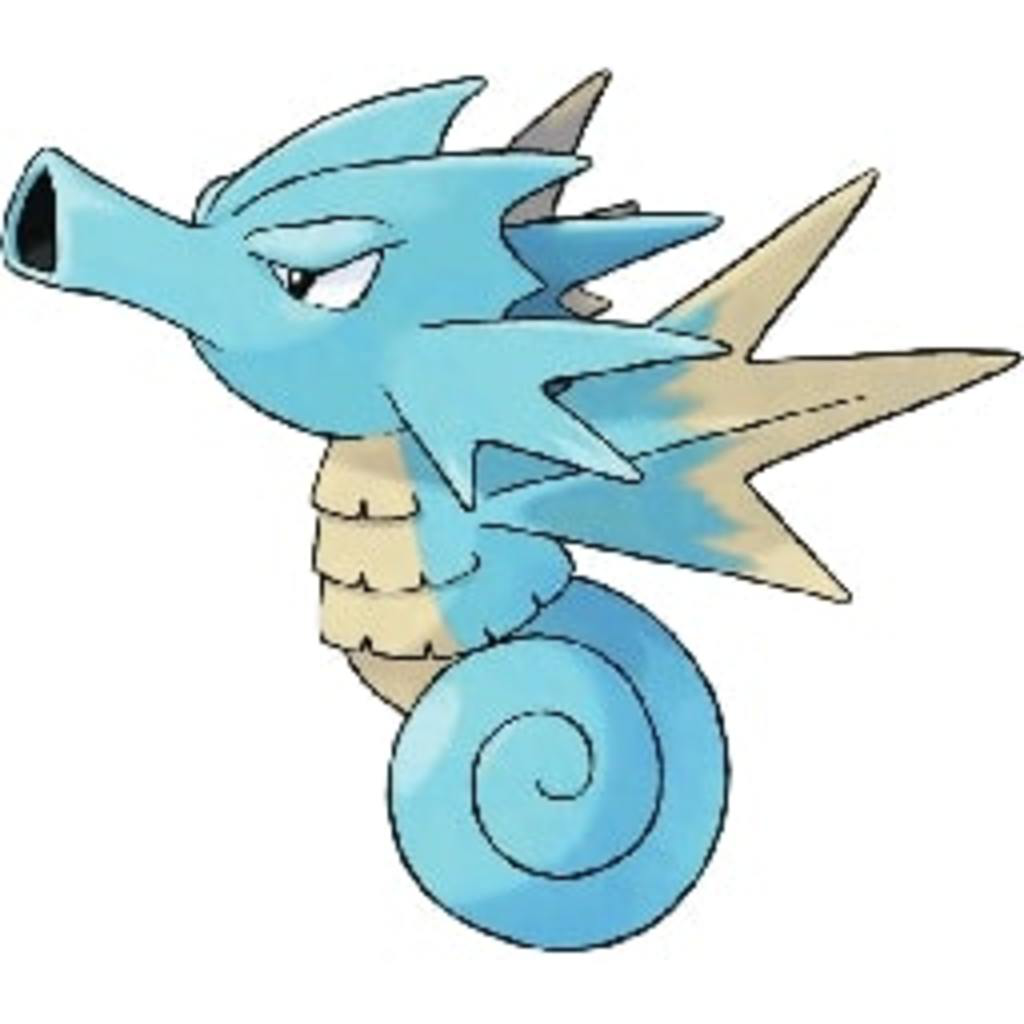

In [ ]:
display_image_from_file(center_cropped_image_name)

#### Export the pre-processed image to the folder expected by StyleGAN2

In [ ]:
output_image_folder='/content/img/'

!mkdir -p $output_image_folder
!cp $center_cropped_image_name $output_image_folder

## StyleGAN2 workflow

### Preparing datasets

In [ ]:
!python dataset_tool.py create_from_images '/content/datasets/real' '/content/img'

Loading images from "/content/img"
Creating dataset "/content/datasets/real"
dataset_tool.py:86: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  'data': tf.train.Feature(bytes_list=tf.train.BytesList(value=[quant.tostring()]))}))
Added 2 images.


### Projecting images to latent space

#### Help

In [ ]:
!python run_projector.py project-real-images --help

usage: run_projector.py project-real-images [-h] --network NETWORK_PKL
                                            --data-dir DATA_DIR --dataset
                                            DATASET_NAME
                                            [--num-snapshots NUM_SNAPSHOTS]
                                            [--num-images NUM_IMAGES]
                                            [--result-dir DIR]

optional arguments:
  -h, --help            show this help message and exit
  --network NETWORK_PKL
                        Network pickle filename
  --data-dir DATA_DIR   Dataset root directory
  --dataset DATASET_NAME
                        Training dataset
  --num-snapshots NUM_SNAPSHOTS
                        Number of snapshots (default: 5)
  --num-images NUM_IMAGES
                        Number of images to project (default: 3)
  --result-dir DIR      Root directory for run results (default: results)


#### Run

In [ ]:
!python run_projector.py project-real-images \
--data-dir='/content/datasets' --dataset=real \
--num-images=2 \
--network=gdrive:networks/stylegan2-ffhq-config-f.pkl \
--num-snapshots=5 \


Local submit - run_dir: results/00001-project-real-images
dnnlib: Running run_projector.project_real_images() on localhost...
Loading networks from "gdrive:networks/stylegan2-ffhq-config-f.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
Loading images from "real"...
tcmalloc: large alloc 4294967296 bytes == 0x55934c726000 @  0x7f3beecaf001 0x7f3bec82d54f 0x7f3bec87db58 0x7f3bec881b17 0x7f3bec920203 0x5592f7de6d54 0x5592f7de6a50 0x5592f7e5b105 0x5592f7e557ad 0x5592f7de8c9f 0x5592f7e29d79 0x5592f7e26cc4 0x5592f7de8ea1 0x5592f7e57bb5 0x5592f7e554ae 0x5592f7de83ea 0x5592f7e5732a 0x5592f7e554ae 0x5592f7d27e2c 0x5592f7e57bb5 0x5592f7de830a 0x5592f7e563b5 0x5592f7de830a 0x5592f7e5660e 0x5592f7e554ae 0x5592f7d27e2c 0x5592f7e57bb5 0x5592f7de830a 0x5592f7e563b5 0x5592f7e554ae 0x5592f7e551b3
tcmalloc: large alloc 4294967296 bytes == 0x55944c726000 @  0x7f3beecad1e7 0x7f3bec8

### Displaying the projected images

#### Boilerplate display utility functions

In [ ]:
def get_projection_folder_name():
  projection_folder_name = '/content/stylegan2/results/00001-project-real-images/'

  return projection_folder_name

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_projection(image_id_as_int,
                       projection_folder_name=None):
  
  if projection_folder_name is None:
    projection_folder_name = get_projection_folder_name()

  image_id = '{:04d}'.format(image_id_as_int)

  ext = '.png'

  # The first picture is the target, then there are the 4 projections as the number of steps increases.
  num_cols = 7

  # Caveat: if nrows is different from 1, then axs is a list of list of axes, instead of a list of axes. So, you will get errors such as:
  # https://stackoverflow.com/questions/43957776/numpy-ndarray-object-has-no-attribute-imshow
  fig, axs = plt.subplots(nrows=1,
                          ncols=num_cols,
                          figsize=(50,50))  
  
  for i, ax in enumerate(axs):
    if i == 0 or i==6:
      # Target (input)
      f_name = 'image' + image_id + '-target'
    else:
      # Projections
      f_name = 'image' + image_id + '-step{:04d}'.format(200*i)

    image_name = projection_folder_name + f_name + ext
    img = mpimg.imread(image_name)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f_name)  

  plt.show()

  return

#### Display with center-crop

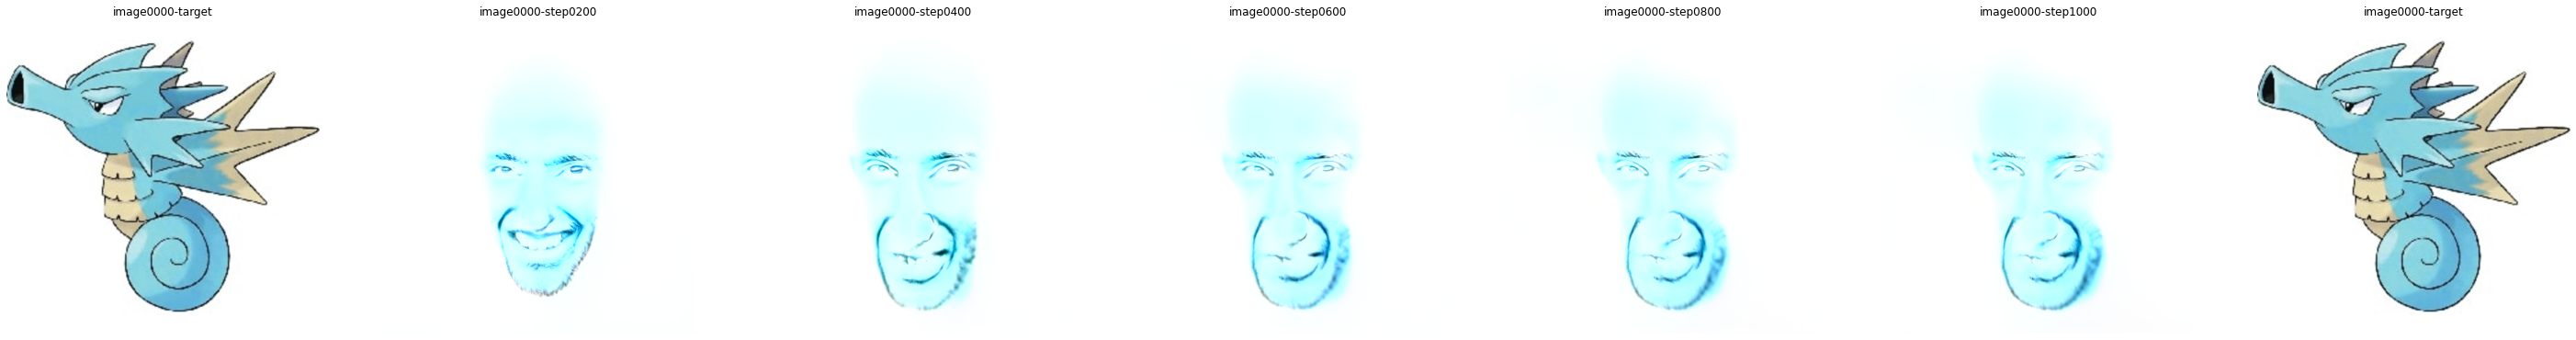

In [ ]:
# The id is the first index (zero).
display_projection(image_id_as_int=0)

#### Display with FFHQ alignment

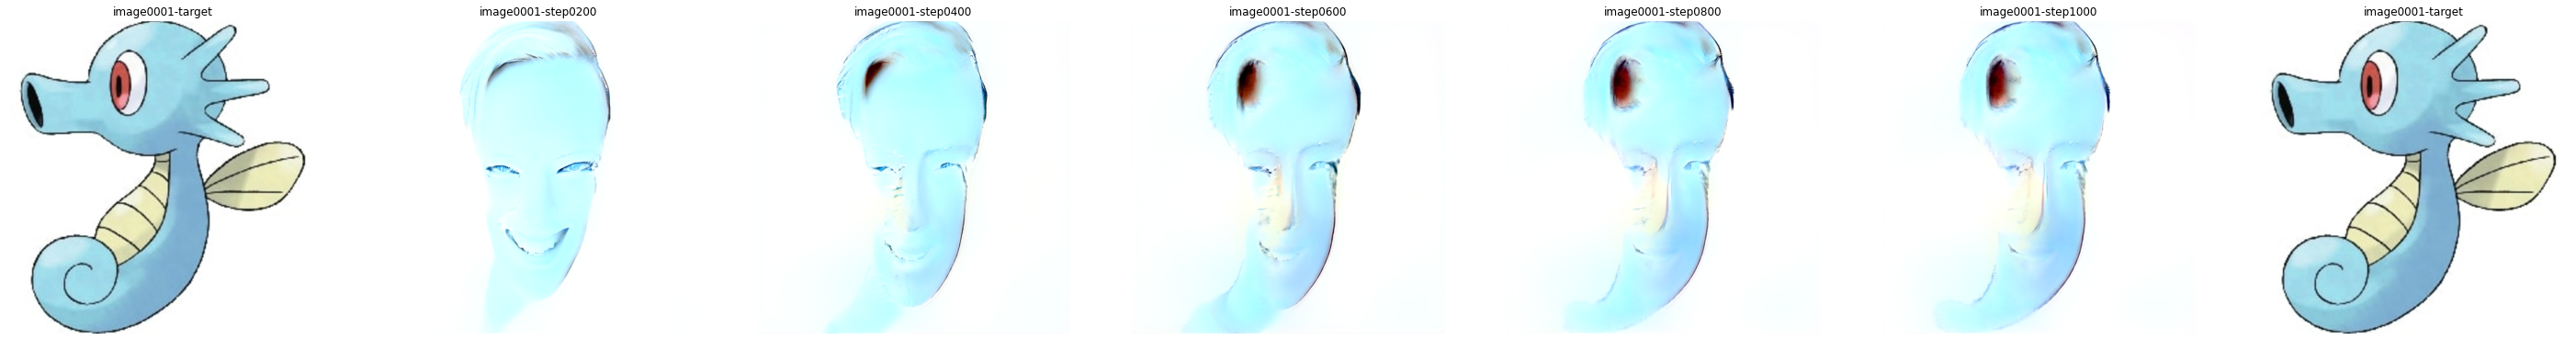

In [ ]:
display_projection(image_id_as_int=1)

#### Archive projection results (images)

In [ ]:
!tar -cvf results.tar.gz results/

results/
results/00000-project-real-images/
results/00000-project-real-images/submit_config.txt
results/00000-project-real-images/_finished.txt
results/00000-project-real-images/log.txt
results/00000-project-real-images/submit_config.pkl
results/00001-project-real-images/
results/00001-project-real-images/image0000-step0600.png
results/00001-project-real-images/image0001-step0200.png
results/00001-project-real-images/submit_config.txt
results/00001-project-real-images/image0001-target.png
results/00001-project-real-images/image0001-step0800.png
results/00001-project-real-images/image0001-step0600.png
results/00001-project-real-images/image0000-step0800.png
results/00001-project-real-images/image0001-step1000.png
results/00001-project-real-images/image0000-step1000.png
results/00001-project-real-images/_finished.txt
results/00001-project-real-images/log.txt
results/00001-project-real-images/image0000-step0400.png
results/00001-project-real-images/image0001-step0400.png
results/00001-pro

## Export projection results as videos

Objective: create a video of the projection procedure.

References:
-   https://www.gwern.net/Faces#interpolations
-   https://www.gwern.net/Faces#reversing-stylegan-to-control-modify-images
-   https://colab.research.google.com/drive/1ShgW6wohEFQtqs_znMna3dzrcVoABKIH

### Boilerplate utility functions

Reference: https://colab.research.google.com/drive/1ShgW6wohEFQtqs_znMna3dzrcVoABKIH

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf

print('Tensorflow version: {}'.format(tf.__version__) )
!nvidia-smi -L
print('GPU Identified at: {}'.format(tf.test.gpu_device_name()))

Tensorflow version: 1.15.0
GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-cb593904-f311-2373-3001-a14aa79e2ad9)
GPU Identified at: /device:GPU:0


In [ ]:
# Download the model of choice
import argparse
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import re
import sys
from io import BytesIO
import IPython.display
import numpy as np
from math import ceil
from PIL import Image, ImageDraw
import imageio

import pretrained_networks

# Choose between these pretrained models - I think 'f' is the best choice:

# 1024×1024 faces
network_pkl = "gdrive:networks/stylegan2-ffhq-config-f.pkl"

# If downloads fails, due to 'Google Drive download quota exceeded' you can try downloading manually from your own Google Drive account
# network_pkl = "/content/drive/My Drive/GAN/stylegan2-ffhq-config-f.pkl"

print('Loading networks from "%s"...' % network_pkl)
_G, _D, Gs = pretrained_networks.load_networks(network_pkl)
noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]

Loading networks from "gdrive:networks/stylegan2-ffhq-config-f.pkl"...


In [ ]:
# Useful utility functions...

# Generates a list of images, based on a list of latent vectors (Z), and a list (or a single constant) of truncation_psi's.
def generate_images_in_w_space(dlatents, truncation_psi):
    Gs_kwargs = dnnlib.EasyDict()
    Gs_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    Gs_kwargs.randomize_noise = False
    Gs_kwargs.truncation_psi = truncation_psi
    dlatent_avg = Gs.get_var('dlatent_avg') # [component]

    imgs = []
    for row, dlatent in log_progress(enumerate(dlatents), name = "Generating images"):
        #row_dlatents = (dlatent[np.newaxis] - dlatent_avg) * np.reshape(truncation_psi, [-1, 1, 1]) + dlatent_avg
        dl = (dlatent-dlatent_avg)*truncation_psi   + dlatent_avg
        row_images = Gs.components.synthesis.run(dlatent,  **Gs_kwargs)
        imgs.append(PIL.Image.fromarray(row_images[0], 'RGB'))
    return imgs       

def generate_images(zs, truncation_psi):
    Gs_kwargs = dnnlib.EasyDict()
    Gs_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    Gs_kwargs.randomize_noise = False
    if not isinstance(truncation_psi, list):
        truncation_psi = [truncation_psi] * len(zs)
        
    imgs = []
    for z_idx, z in log_progress(enumerate(zs), size = len(zs), name = "Generating images"):
        Gs_kwargs.truncation_psi = truncation_psi[z_idx]
        noise_rnd = np.random.RandomState(1) # fix noise
        tflib.set_vars({var: noise_rnd.randn(*var.shape.as_list()) for var in noise_vars}) # [height, width]
        images = Gs.run(z, None, **Gs_kwargs) # [minibatch, height, width, channel]
        imgs.append(PIL.Image.fromarray(images[0], 'RGB'))
    return imgs

def generate_zs_from_seeds(seeds):
    zs = []
    for seed_idx, seed in enumerate(seeds):
        rnd = np.random.RandomState(seed)
        z = rnd.randn(1, *Gs.input_shape[1:]) # [minibatch, component]
        zs.append(z)
    return zs

# Generates a list of images, based on a list of seed for latent vectors (Z), and a list (or a single constant) of truncation_psi's.
def generate_images_from_seeds(seeds, truncation_psi):
    return generate_images(generate_zs_from_seeds(seeds), truncation_psi)

def saveImgs(imgs, location):
  for idx, img in log_progress(enumerate(imgs), size = len(imgs), name="Saving images"):
    file = location+ str(idx) + ".png"
    img.save(file)

def imshow(a, format='png', jpeg_fallback=True):
  a = np.asarray(a, dtype=np.uint8)
  str_file = BytesIO()
  PIL.Image.fromarray(a).save(str_file, format)
  im_data = str_file.getvalue()
  try:
    disp = IPython.display.display(IPython.display.Image(im_data))
  except IOError:
    if jpeg_fallback and format != 'jpeg':
      print ('Warning: image was too large to display in format "{}"; '
             'trying jpeg instead.').format(format)
      return imshow(a, format='jpeg')
    else:
      raise
  return disp

def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

        
def clamp(x, minimum, maximum):
    return max(minimum, min(x, maximum))
    
def drawLatent(image,latents,x,y,x2,y2, color=(255,0,0,100)):
  buffer = PIL.Image.new('RGBA', image.size, (0,0,0,0))
   
  draw = ImageDraw.Draw(buffer)
  cy = (y+y2)/2
  draw.rectangle([x,y,x2,y2],fill=(255,255,255,180), outline=(0,0,0,180))
  for i in range(len(latents)):
    mx = x + (x2-x)*(float(i)/len(latents))
    h = (y2-y)*latents[i]*0.1
    h = clamp(h,cy-y2,y2-cy)
    draw.line((mx,cy,mx,cy+h),fill=color)
  return PIL.Image.alpha_composite(image,buffer)
             
  
def createImageGrid(images, scale=0.25, rows=1):
   w,h = images[0].size
   w = int(w*scale)
   h = int(h*scale)
   height = rows*h
   cols = ceil(len(images) / rows)
   width = cols*w
   canvas = PIL.Image.new('RGBA', (width,height), 'white')
   for i,img in enumerate(images):
     img = img.resize((w,h), PIL.Image.ANTIALIAS)
     canvas.paste(img, (w*(i % cols), h*(i // cols))) 
   return canvas

def convertZtoW(latent, truncation_psi=0.7, truncation_cutoff=9):
  dlatent = Gs.components.mapping.run(latent, None) # [seed, layer, component]
  dlatent_avg = Gs.get_var('dlatent_avg') # [component]
  for i in range(truncation_cutoff):
    dlatent[0][i] = (dlatent[0][i]-dlatent_avg)*truncation_psi + dlatent_avg
    
  return dlatent

def interpolate(zs, steps):
   out = []
   for i in range(len(zs)-1):
    for index in range(steps):
     fraction = index/float(steps) 
     out.append(zs[i+1]*fraction + zs[i]*(1-fraction))
   return out

# Taken from https://github.com/alexanderkuk/log-progress
def log_progress(sequence, every=1, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )


### Run with more snapshots

The number of snapshots is increased in order to have a smoother video.

In [ ]:
!python run_projector.py project-real-images \
  --data-dir='/content/datasets' --dataset=real \
  --num-images=2 \
  --network=gdrive:networks/stylegan2-ffhq-config-f.pkl \  
  --num-snapshots=1000 \


Local submit - run_dir: results/00001-project-real-images
dnnlib: Running run_projector.project_real_images() on localhost...
Loading networks from "gdrive:networks/stylegan2-ffhq-config-f.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
Loading images from "real"...
tcmalloc: large alloc 4294967296 bytes == 0x59eda000 @  0x7f1ffa5ab001 0x7f1ff80cf765 0x7f1ff8133dc0 0x7f1ff8135c5f 0x7f1ff81cc238 0x50ac25 0x50d390 0x508245 0x509642 0x595311 0x54a6ff 0x551b81 0x5a067e 0x50d966 0x508245 0x50a080 0x50aa7d 0x50d390 0x508245 0x58958c 0x5a067e 0x50d966 0x509d48 0x50aa7d 0x50c5b9 0x509d48 0x50aa7d 0x50c5b9 0x508245 0x58958c 0x5a067e
tcmalloc: large alloc 4294967296 bytes == 0x7f1db4000000 @  0x7f1ffa5a91e7 0x7f1ff80cf5e1 0x7f1ff8133e88 0x7f1ff8134147 0x7f1ff81cc118 0x50ac25 0x50d390 0x508245 0x50a080 0x50aa7d 0x50d390 0x508245 0x50a080 0x50aa7d 0x50d390 0x508245 0x50a080 0

### Aggregate snapshots into a video

#### Parameters

In [ ]:
results_folder_path = "/content/stylegan2/results/00001-project-real-images/"

ext = '.png'

In [ ]:
image_id_as_int = 1

image_id = '{:04d}'.format(image_id_as_int)
image_root_name = "image" + image_id

#### Create a video

Reference: https://colab.research.google.com/drive/1ShgW6wohEFQtqs_znMna3dzrcVoABKIH#scrollTo=4_s8h-ilzHQc

In [ ]:
import glob

imgs_regex = results_folder_path+image_root_name+"-step[0-9]*"+ext
imgs = sorted(glob.glob(imgs_regex))

target_imgs_regex = results_folder_path+image_root_name+"-target"+ext
target_imgs = sorted(glob.glob(target_imgs_regex))

assert len(target_imgs) == 1, "More than one target found?"
target_img = imageio.imread(target_imgs[0])

movieName = "movie{}.mp4".format(image_id)
with imageio.get_writer(movieName, mode='I') as writer:
    for filename in log_progress(imgs, name = "Creating animation"):
        image = imageio.imread(filename)

        # Concatenate images with original target image
        w,h = image.shape[0:2]
        canvas = PIL.Image.new('RGBA', (w*2,h), 'white')
        canvas.paste(Image.fromarray(target_img), (0, 0))
        canvas.paste(Image.fromarray(image), (w, 0))

        writer.append_data(np.array(canvas))  

Done.

# Train a new network with pokemons

## Colab attempts:

In [ ]:
ls

dataset_tool.py*  LICENSE.txt*             README.md*         run_training.py*
dnnlib/           metrics/                 run_generator.py*  test_nvcc*
Dockerfile*       pretrained_networks.py*  run_metrics.py*    test_nvcc.cu*
docs/             projector.py*            run_projector.py*  training/


In [ ]:
!unzip ../poke.zip -d /content/img/
!mkdir -p ./datasets/real

change `train.image_snapshot_ticks = train.network_snapshot_ticks = 2` in run_training.py

In [ ]:
!python dataset_tool.py create_from_images ./datasets/real ../img/pokemon_jpg/pokemon_jpg

Loading images from "../img/pokemon_jpg/pokemon_jpg"
Creating dataset "./datasets/real"
dataset_tool.py:86: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  'data': tf.train.Feature(bytes_list=tf.train.BytesList(value=[quant.tostring()]))}))
Added 819 images.


In [ ]:
!python dataset_tool.py display ./datasets/real

Loading dataset "./datasets/real"
tcmalloc: large alloc 4294967296 bytes == 0x564cd02f0000 @  0x7f455bb4d001 0x7f455934754f 0x7f4559397b58 0x7f455939bb17 0x7f455943a203 0x564cc86f4d54 0x564cc86f4a50 0x564cc8769105 0x564cc87637ad 0x564cc86f6c9f 0x564cc8737d79 0x564cc8734cc4 0x564cc86f5559 0x564cc87694f8 0x564cc87634ae 0x564cc8635e2c 0x564cc8765bb5 0x564cc87637ad 0x564cc86f63ea 0x564cc87643b5 0x564cc87634ae 0x564cc87631b3 0x564cc882d182 0x564cc882d4fd 0x564cc882d3a6 0x564cc8804723 0x564cc88043cc 0x7f455a935bf7 0x564cc88042aa
tcmalloc: large alloc 4294967296 bytes == 0x564dd02f0000 @  0x7f455bb4b1e7 0x7f455934746e 0x7f4559397c7b 0x7f455939835f 0x7f455943a103 0x564cc86f4d54 0x564cc86f4a50 0x564cc8769105 0x564cc87634ae 0x564cc86f63ea 0x564cc876532a 0x564cc87634ae 0x564cc86f63ea 0x564cc876532a 0x564cc87634ae 0x564cc86f63ea 0x564cc876532a 0x564cc86f630a 0x564cc87643b5 0x564cc87634ae 0x564cc86f63ea 0x564cc87687f0 0x564cc87634ae 0x564cc86f63ea 0x564cc876532a 0x564cc87637ad 0x564cc86f6c9f 0x564c

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13132044806245090832, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5587639105540299432
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 2787319508611380612
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14949928141
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15780499113946510766
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
# https://blog.csdn.net/hesongzefairy/article/details/106083779

import os
import tensorflow as tf 

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8 # 根据自己的需求确定
session = tf.Session(config=config)
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [ ]:
%cd /content/stylegan2/
!python run_training.py --num-gpus=1 --data-dir=./datasets --config=config-f --total-kimg=1 --dataset=real --mirror-augment=true
# batchsize>=4 RAM crashes, and tons of traceback when bs <=2

### Pytorch StyleGAN-ADA

In [ ]:
# https://github.com/jeffheaton/pretrained-gan-fish/blob/main/fish-gan.ipynb

%tensorflow_version 1.x
!git clone https://github.com/NVlabs/stylegan2-ada.git

import sys
import pickle
import os
import numpy as np
import PIL.Image
from IPython.display import Image
import matplotlib.pyplot as plt

sys.path.insert(0, "/content/stylegan2-ada")

import dnnlib
import dnnlib.tflib as tflib

def seed2vec(Gs, seed):
  rnd = np.random.RandomState(seed)
  return rnd.randn(1, *Gs.input_shape[1:])

def init_random_state(Gs, seed):
  rnd = np.random.RandomState(seed) 
  noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]
  tflib.set_vars({var: rnd.randn(*var.shape.as_list()) for var in noise_vars}) # [height, width]

def display_image(data, scale):
  img = PIL.Image.fromarray(data, 'RGB')
  width, height = img.size

  img = img.resize((
        int(width * scale), 
        int(height * scale)), 
        PIL.Image.ANTIALIAS)
  display(img)

def generate_image(Gs, z, truncation_psi):
    # Render images for dlatents initialized from random seeds.
    Gs_kwargs = {
        'output_transform': dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True),
        'randomize_noise': False
    }
    if truncation_psi is not None:
        Gs_kwargs['truncation_psi'] = truncation_psi

    label = np.zeros([1] + Gs.input_shapes[1][1:])
    images = Gs.run(z, label, **Gs_kwargs) # [minibatch, height, width, channel]
    return images[0]

Cloning into 'stylegan2-ada'...
remote: Enumerating objects: 71, done.
remote: Total 71 (delta 0), reused 0 (delta 0), pack-reused 71
Unpacking objects: 100% (71/71), done.


In [ ]:
import torch
torch.cuda.set_per_process_memory_fraction(0.7, 0)
torch.cuda.empty_cache()
total_memory = torch.cuda.get_device_properties(0).total_memory

In [ ]:
total_memory

15843721216

In [ ]:
!unzip /content/poke.zip -d /content/img/
%cd stylegan2-ada/

In [ ]:
!mkdir -p ./datasets/real
!python dataset_tool.py create_from_images ./datasets/real ../img/pokemon_jpg/pokemon_jpg

Loading images from "../img/pokemon_jpg/pokemon_jpg"
Creating dataset "./datasets/real"
dataset_tool.py:96: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  'data': tf.train.Feature(bytes_list=tf.train.BytesList(value=[quant.tostring()]))}))
Added 819 images.


In [ ]:
#!mkdir -p results
!python train.py --gpus=1 --data=./datasets/real \
--mirror=1 --kimg=1 --outdir=./results --aug=ada

tcmalloc: large alloc 4294967296 bytes == 0x562a2490e000 @  0x7fe5f2303001 0x7fe5ef54654f 0x7fe5ef596b58 0x7fe5ef59ab17 0x7fe5ef639203 0x562a1e63dd54 0x562a1e63da50 0x562a1e6b2105 0x562a1e6ac7ad 0x562a1e63fc9f 0x562a1e680d79 0x562a1e67dcc4 0x562a1e63e559 0x562a1e6b24f8 0x562a1e6ac4ae 0x562a1e57ee2c 0x562a1e6aebb5 0x562a1e6ac4ae 0x562a1e57ee2c 0x562a1e6aebb5 0x562a1e6ac7ad 0x562a1e57ee2c 0x562a1e6aebb5 0x562a1e63f30a 0x562a1e6ad3b5 0x562a1e6ac4ae 0x562a1e6ac1b3 0x562a1e776182 0x562a1e7764fd 0x562a1e7763a6 0x562a1e74d723
tcmalloc: large alloc 4294967296 bytes == 0x562b2490e000 @  0x7fe5f23011e7 0x7fe5ef54646e 0x7fe5ef596c7b 0x7fe5ef59735f 0x7fe5ef639103 0x562a1e63dd54 0x562a1e63da50 0x562a1e6b2105 0x562a1e6ac4ae 0x562a1e63f3ea 0x562a1e6ae32a 0x562a1e6ac4ae 0x562a1e63f3ea 0x562a1e6ae32a 0x562a1e6ac4ae 0x562a1e63f3ea 0x562a1e6ae32a 0x562a1e63f30a 0x562a1e6ad3b5 0x562a1e6ac4ae 0x562a1e63f3ea 0x562a1e6b17f0 0x562a1e6ac4ae 0x562a1e63f3ea 0x562a1e6ae32a 0x562a1e6ac7ad 0x562a1e63fc9f 0x562a1e68

# On GCP:

In [ ]:
python -c 'import tensorflow as tf; print(tf.__version__)'

gsutil cp gs://pokedata/poke.zip poke.zip

# python3 -m venv env
# source ./env/bin/activate 
# python -m pip install tensorflow-gpu==1.15

unzip poke.zip -d ./img/
git clone https://github.com/NVlabs/stylegan2.git
cd stylegan2
mkdir -p ./datasets/real
python dataset_tool.py create_from_images ./datasets/real ../img/pokemon_jpg/pokemon_jpg

python run_training.py --num-gpus=1 --data-dir=./datasets --config=config-f --total-kimg=1 --dataset=real --mirror-augment=true

Change `training/training_loop.py` `resume_pkl` to the corresponding folder to continue training.

In [ ]:
python run_training.py --num-gpus=1 --data-dir=./datasets --config=config-f --total-kimg=10000 --dataset=real --mirror-augment=true

- tick 0     kimg 0.1      lod 0.00  minibatch 16   time 1m 37s       sec/tick 96.5    sec/kimg 1508.43 maintenance 0.0    gpumem 5.1  
- network-snapshot-000000        time 1h 31m 20s   fid50k 385.5648
- tick 1     kimg 8.1      lod 0.00  minibatch 16   time 3h 52m 05s   sec/tick 8275.3  sec/kimg 1034.41 maintenance 5552.7 gpumem 5.3
- tick 2     kimg 16.1     lod 0.00  minibatch 16   time 6h 10m 03s   sec/tick 8278.4  sec/kimg 1034.80 maintenance 0.0    gpumem 5.3
- tick 3     kimg 24.1     lod 0.00  minibatch 16   time 8h 28m 14s   sec/tick 8290.6  sec/kimg 1036.33 maintenance 0.0    gpumem 5.3
- network-snapshot-000024        time 1h 31m 08s   fid50k 448.4003

> *process stopped (code 1006) after 1 hour of not looking at ssh :)*
resume training  
resume_kimg = 24.1

- tick 0     kimg 24.2     lod 0.00  minibatch 16   time 1m 31s       sec/tick 91.4    sec/kimg 1427.42 maintenance 0.0    gpumem 5.1
- network-snapshot-000024        time 1h 26m 58s   fid50k 447.7951

> resume training  
resume_kimg = 40.1

- tick 0     kimg 40.2     lod 0.00  minibatch 16   time 1m 33s       sec/tick 93.0    sec/kimg 1453.80 maintenance 0.0    gpumem 5.1
- network-snapshot-000040        time 1h 27m 48s   fid50k 347.9535
- tick 1     kimg 48.2     lod 0.00  minibatch 16   time 3h 43m 11s   sec/tick 7960.1  sec/kimg 995.02  maintenance 5337.4 gpumem 5.3
- tick 2     kimg 56.2     lod 0.00  minibatch 16   time 5h 56m 07s   sec/tick 7976.3  sec/kimg 997.04  maintenance 0.0    gpumem 5.3
- network-snapshot-000056        time 1h 27m 59s   fid50k 358.6735
- tick 3     kimg 64.2     lod 0.00  minibatch 16   time 9h 38m 26s   sec/tick 7998.4  sec/kimg 999.80  maintenance 5341.0 gpumem 5.3

In [ ]:
zip -r *file_name*.zip *file_path*
rm -rf 00000-stylegan2-real-1gpu-config-f/
# drwxr-xr-x 2 yue_wang2 yue_wang2 4096 May 15 02:05 00000-stylegan2-real-1gpu-config-f